In [552]:
#Imports
from IPython.display import Image
import networkx as nx
import numpy as np
import itertools
import re

# Question 1: Find the shortest common superstring for eight 3-mers: {AGT,AAA,ACT,AAC,CTT ,GTA,TTT,TAA} by solving the following two problems:

## 1.1) Construct the graph with 8 vertices corresponding to these 3-mers (Hamiltonian path approach, or the overlap graph) and find a Hamiltonian path (7 edges) which visits each vertex exactly once. Write the superstring corresponding to this Hamiltonian path.


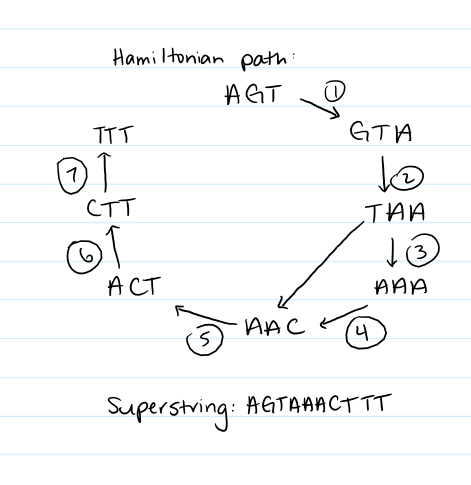

In [5]:
Image('hamiltonian_path.png')

## 1.2) Construct a de Bruijin graph with 8 edges corresponding to these 3-mers and find an Eulerian path (8 edges) which visits each edge exactly once. Write the superstring corresponding to this Eulerian path.

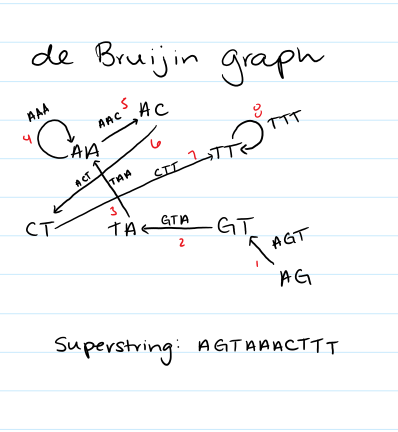

In [6]:
Image('deBruijin_graph.png')

# Question 2: You are given a text file with reads coming from a transcript sequence. Write a program to (1) break the reads into 30-mers and (2) use de Bruijin graph and Eulerian path walk to assemble the 30-mers.

In [495]:
PS2_2sequences = (open('BI183_PS2_Q2', 'r').read().split('\n'))
simple_seq = ('AGTAAACTTT')

def make_kmers(sequences, kmer_len):
    kmers = []
    for seq in sequences:
        for i in range(len(seq)):
            subseq = seq[i:i+kmer_len]
            if len(subseq) == kmer_len:
                if subseq in kmers:
                    pass
                else:
                    kmers.append(subseq)
    return kmers


# simple_kmers = []
# for i in range(len(simple_seq)):
#     subseq = simple_seq[i:i+3]
#     if len(subseq) == 3:
#         simple_kmers.append(subseq)
# print(simple_kmers)

#Nodes will be 29 long. Edged are 30 long

In [496]:
#Make unique node list. You are making a dictionary
#For each kmer, you will look at beginning 29 and end 29 of the sequences and see if it is in the dictionary. 
#If it not in the dictionary, add it, with a number n, and then add 1 to n counter. 
#If it is the dictionary, skip it and keep going. Do not add 1 to n

def make_node_dict(kmers):
    '''
    This fxn takes a list of kmers that have been generated by make_kmers fxn and gives a dictionary of nodes. 
    node_dict = {node_seq: index}
    Indices are arbitrary, but should be kept constant
    '''
    node_dict = {}
    n = 0
    for kmer in kmers: 
        if kmer[0:-1] not in node_dict:
            node_dict[kmer[0:-1]] = n
            n += 1
        elif kmer[1:] not in node_dict:
            node_dict[kmer[1:]] = n
            n += 1
        elif kmer[0:-1] in node_dict:
            node_dict = node_dict
        elif kmer[1:] in node_dict:
            node_dict = node_dict
    return node_dict

# simple_kmers_node_dict = make_node_dict(simple_kmers)
# print(simple_kmers_node_dict)
# print(simple_kmers[0][0:-1])

In [497]:
#Make the edge_list. Look at each sequence in your kmers list, and look at the first 29 letters and find the index 
#they correspond to and the second 29 letters and find the sequence they correspond to. 

def make_edges_list(kmers, node_dict):
    edge_list = []
    for kmer in kmers: 
        coordinates = []
        coordinates.append(node_dict.get(kmer[0:-1]))
        coordinates.append(node_dict.get(kmer[1:]))
        coordinates = tuple(coordinates)
        if (coordinates,kmer) not in edge_list:
            edge_list.append((coordinates, kmer))
    return edge_list


def eulerian_make_edges_graph(kmers, node_dict):
    '''
    This fxn takes a list of kmers and makes it into a eulerian circuit so it can be sorted by networkx
    It returns the start and end nodes as well so you know which node to start with to construct your sequence later
    '''
    G = nx.DiGraph()
    coordinates = []
    #First, make the list of edges
    for kmer in kmers: 
        coordinate = []
        coordinate.append(node_dict.get(kmer[0:-1]))
        coordinate.append(node_dict.get(kmer[1:]))
        coordinates.append(coordinate)
        G.add_edge(coordinate[0], coordinate[1])
    coordinates = list(coordinates)
#     print(coordinates)   
#     print(list(G.edges()))

    #Next, find the beginning and end coordinates
    start = 0
    end = 0
    for key, value in node_dict.items():
        times_in = 0
        times_out = 0
        for coordinate in coordinates:
            if coordinate[0] == value:
                times_in += 1 
            if coordinate[1] == value:
                times_out += 1
        if times_in < times_out:
            start = value
        if times_in > times_out:
            end = value
        else: 
            pass
    #Make into a eulerian circuit so you can use the networkx code
    coordinates.append((start,end))
    G.add_edge(start,end)
    return (G, (start, end))


# simple_edge_list = make_edges_list(simple_kmers, simple_kmers_node_dict)
# print(simple_edge_list)

# eulerian_edge_list = eulerian_make_edges_graph(simple_kmers, simple_kmers_node_dict)
# print(eulerian_edge_list)
# print(list(eulerian_edge_list[0].edges()))
# print(eulerian_edge_list[1])

# # #This takes the edge list that you made with eulerian_make_edges_graph and sorts it with an eulerian circuit
# eularian_sorted_list = list(nx.eulerian_circuit(eulerian_edge_list[0], eulerian_edge_list[1][1]))
# print(eularian_sorted_list)



In [498]:
#Take the new sorted list and construct the sequence from it. 
def construct_seq_from_eulerian_path(eulerian_path, edge_list):
    sequence = []
    for coordinate in eulerian_path:
        for i in edge_list:
            if sequence == []:
                if coordinate == i[0]:
                    sequence += i[1][:]
            else:
                if coordinate == i[0]:
                    sequence += i[1][-1:]
    sequence =''.join(sequence)
    return sequence

# test = construct_seq_from_eulerian_path(eularian_sorted_list, simple_edge_list)
# print(test)

In [500]:
thirtymers = make_kmers(PS2_2sequences, 30)
node_dict = make_node_dict(thirtymers)
edge_list = make_edges_list(thirtymers, node_dict)
eulerian_edge_list = eulerian_make_edges_graph(thirtymers, node_dict)
print(eulerian_edge_list)
print(list(eulerian_edge_list[0].edges()))
thirtymer_eularian_sorted_list = list(nx.eulerian_circuit(eulerian_edge_list[0]))
# final_seq = construct_seq_from_eulerian_path(thirtymer_eularian_sorted_list, edge_list)
# print(final_seq)

(<networkx.classes.digraph.DiGraph object at 0x10b659c18>, (0, 0))
[(0, 0), (0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10), (10, 11), (11, 12), (12, 13), (13, 14), (14, 15), (15, 16), (16, 17), (17, 18), (18, 19), (19, 20), (20, 21), (21, 22), (22, 23), (23, 24), (24, 25), (25, 26), (26, 27), (27, 28), (28, 29), (29, 30), (30, 31), (31, 32), (32, 33), (33, 34), (34, 35), (35, 36), (36, 37), (37, 38), (38, 39), (39, 40), (40, 41), (41, 42), (42, 43), (43, 44), (44, 45), (45, 46), (46, 47), (47, 48), (48, 49), (49, 50), (50, 51), (51, 52), (52, 53), (53, 54), (54, 55), (55, 56), (56, 57), (57, 58), (58, 59), (59, 60), (60, 61), (61, 62), (62, 63), (63, 64), (64, 65), (65, 66), (66, 67), (67, 68), (68, 69), (69, 70), (70, 71), (71, 72), (72, 73), (73, 74), (74, 75), (75, 76), (76, 77), (77, 78), (78, 79), (79, 80), (80, 81), (81, 82), (82, 83), (83, 84), (84, 85), (85, 86), (86, 87), (87, 88), (88, 89), (89, 90), (90, 91), (91, 92), (92, 93), (93, 94), (94

NetworkXError: G is not Eulerian.

In [494]:
simple_seqs = ['AGTAAACTTT', 'GTAAACTTTA']
threemers = make_kmers(simple_seqs, 3)
simple_seqs_node_dict = make_node_dict(threemers)
edge_list = make_edges_list(threemers, simple_seqs_node_dict)
# print(edge_list)
eulerian_edge_list = eulerian_make_edges_graph(threemers, simple_seqs_node_dict)
print(list(eulerian_edge_list[0].edges()))
eulerian_sorted_list = list(nx.eulerian_circuit(eulerian_edge_list[0]))
print(eularian_sorted_list)
threemer_seq = construct_seq_from_eulerian_path(eulerian_sorted_list, edge_list)
print(threemer_seq)

[(0, 1), (1, 2), (2, 0), (2, 3), (3, 3), (3, 4), (4, 5), (5, 6), (6, 2), (6, 6)]
[(0, 1), (1, 2), (2, 3), (3, 3), (3, 4), (4, 5), (5, 6), (6, 6), (6, 0)]
AGTAAACTTTA


In [482]:
thirtymers = make_kmers(PS2_2sequences, 30)
thirtymer_node_dict = make_node_dict(thirtymers)
thirtymer_edge_list = make_edges_list(thirtymers, thirtymer_node_dict)
# print(thirtymer_edge_list)
thirtymer_eulerian_edge_list = eulerian_make_edges_graph(thirtymers, thirtymer_node_dict)
print(list(thirtymer_eulerian_edge_list[0].edges()))
thirtymer_eulerian_sorted_list = list(nx.eulerian_circuit(thirtymer_eulerian_edge_list[0]))
# print(thirtymer_eularian_sorted_list)
# thirtymer_seq = construct_seq_from_eulerian_path(thirtymer_eulerian_sorted_list, thirtymer_edge_list)
# print(threemer_seq)

[(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10), (10, 11), (11, 12), (12, 13), (13, 14), (14, 15), (15, 16), (16, 17), (17, 18), (18, 19), (19, 20), (20, 21), (21, 22), (22, 23), (23, 24), (24, 25), (25, 26), (26, 27), (27, 28), (28, 29), (29, 30), (30, 31), (31, 32), (32, 33), (33, 34), (34, 35), (35, 36), (36, 37), (37, 38), (38, 39), (39, 40), (40, 41), (41, 42), (42, 43), (43, 44), (44, 45), (45, 46), (46, 47), (47, 48), (48, 49), (49, 50), (50, 51), (51, 52), (52, 53), (53, 54), (54, 55), (55, 56), (56, 57), (57, 58), (58, 59), (59, 60), (60, 61), (61, 62), (62, 63), (63, 64), (64, 65), (65, 66), (66, 67), (67, 68), (68, 69), (69, 70), (70, 71), (71, 72), (72, 73), (73, 74), (74, 75), (75, 76), (76, 77), (77, 78), (78, 79), (79, 80), (80, 81), (81, 82), (82, 83), (83, 84), (84, 85), (85, 86), (86, 87), (87, 88), (88, 89), (89, 90), (90, 91), (91, 92), (92, 93), (93, 94), (94, 95), (95, 96), (96, 97), (97, 98), (98, 99), (99, 100), (100, 101), (101,

NetworkXError: G is not Eulerian.

# Question 3: You are given a splicing graph below, how many possible paths are there connecting the 5’ end all the way to 3’ end? Draw the isoforms corresponding to these paths.

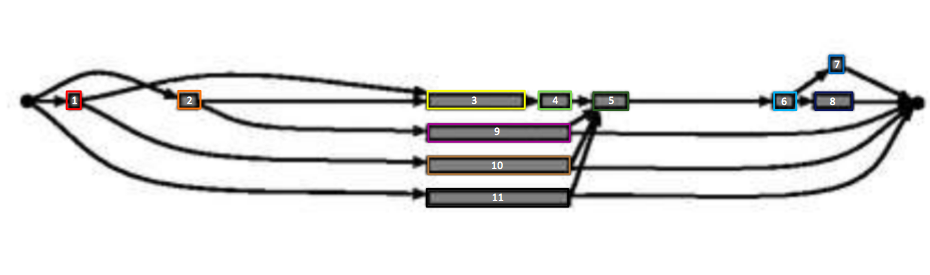

In [4]:
Image('Problem_3_paths.png')

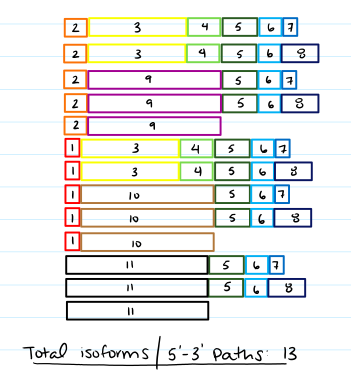

In [5]:
Image('Problem_3_isoforms.png')

# Question 4: Consider the sequences v = TACGGGTAT and w = GACGTACG. Assume that the match premium is +1 and that the mismatch and indel penalties are -1.

## 4.1) Fill out the dynamic programming table for a global alignment between v and w. Write down ALL the alignments with the maximal score.

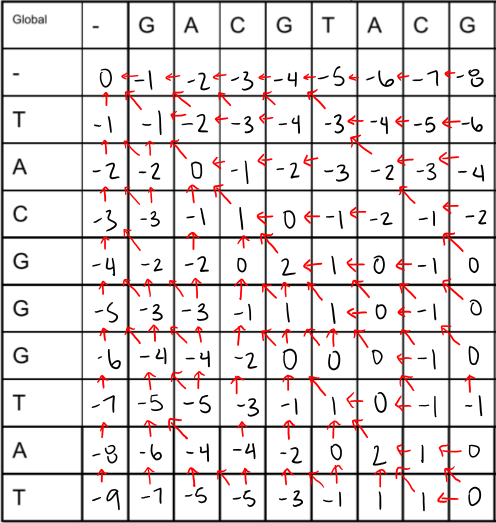

In [305]:
Image('global_alignment.png')

## 4.2) Fill out the dynamic programming table for a local alignment between v and w.Write down ALL the alignments with the maximal score.

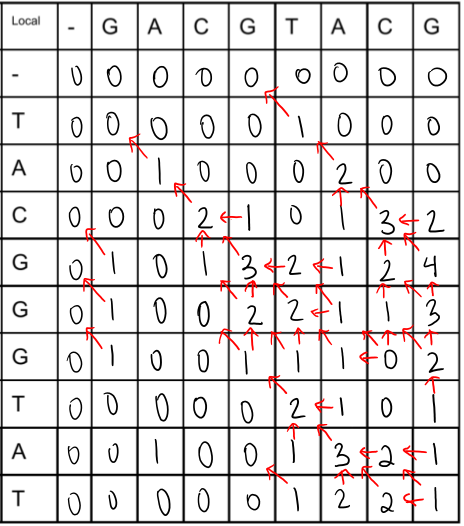

In [306]:
Image('local_alignment.png')

# Question 5: Human Caspase 1 is a member of the Caspase gene family and its activation will induce cell apoptosis (you can find out more here: http://www.ncbi.nlm.nih.gov/gene/834). In this question, you will identify the location of several sequences in the CASP1 gene by alignment. The FASTA sequence of the gene is provided. (Note: first remove the header and the line breaks since it’s one continuous sequence) Using dynamic programming, create an alignment graph and scoring matrix to find the global and local alignments of the following sequence and report any differences if they exist: “ATCTCAAACACATGCGGGACCCCAGATA”

In [436]:
def global_alignment_graph(ref_seq, search_seq):
    #Make a matrix full of zeros that is the len(ref_seq)+1 and len(search_seq+1)
    global_graph = np.zeros((len(search_seq)+2, len(ref_seq)))
    
    #Initialize graph
    icount = 0
    for i in range(0, len(search_seq)+2):
        global_graph[i,0]= icount
        icount -= 1
        
    jcount = 0
    for j in range(0,len(ref_seq)):
        global_graph[0,j] = jcount
        jcount -= 1
 
    
    #Fill in the graph according to rules. At each position, calc score for match/mismatch or indel. Take greatest. 
    for i in range(1, len(search_seq)+2):
        for j in range(1, len(ref_seq)):
            diagonal = global_graph[i-1,j-1]
            above = global_graph[i-1, j]-1
            left = global_graph[i,j-1]-1
            
            #First, determine if you have a match or mismatch and calc. diagonal from that
            if ref_seq[i-1] == search_seq[j-1]:
                diagonal += 1
            else: 
                diagonal -= 1
                
            #Then, determine if the indel penalty is bigger    
            if diagonal > above and diagonal > left or diagonal == above and diagonal > left or diagonal > above and diagonal == left:
                global_graph[i,j]= diagonal
            if above > diagonal and above > left or above == diagonal and above > left or above > diagonal and above == left:
                global_graph[i,j] = above
            if left > diagonal and left > above or left== diagonal and left > above or left > diagonal and left == above:
                global_graph[i,j] = left

    return global_graph
global_alignment_graph('TACGGGTAT','GACGTACG')

array([[ 0., -1., -2., -3., -4., -5., -6., -7., -8.],
       [-1., -1., -2., -3., -4., -3., -4., -5., -6.],
       [-2., -2.,  0., -1., -2., -3., -2., -3., -4.],
       [-3., -3., -1.,  1.,  0., -1., -2., -1., -2.],
       [-4., -2., -2.,  0.,  2.,  1.,  0., -1.,  0.],
       [-5., -3., -3., -1.,  1.,  1.,  0., -1.,  0.],
       [-6., -4., -4., -2.,  0.,  0.,  0., -1.,  0.],
       [-7., -5., -5., -3., -1.,  1.,  0., -1., -1.],
       [-8., -6., -4., -4., -2.,  0.,  2.,  1.,  0.],
       [-9., -7., -5., -5., -3., -1.,  1.,  1.,  0.]])

In [433]:
def local_alignment_graph(ref_seq, search_seq):
    #Make a matrix full of zeros that is the len(ref_seq)+1 and len(search_seq+1)
    local_graph = np.zeros((len(search_seq)+2, len(ref_seq)))
    #Fill in the graph according to rules. At each position, calc score for match/mismatch or indel. Take greatest. 
    for i in range(1, len(search_seq)+2):
        for j in range(1, len(ref_seq)):
            diagonal = local_graph[i-1,j-1]
            above = local_graph[i-1, j]-1
            left = local_graph[i,j-1]-1
            
            #First, determine if you have a match or mismatch and calc. diagonal from that
            if ref_seq[i-1] == search_seq[j-1]:
                diagonal += 1
            else: 
                diagonal -= 1
                
            #Then, determine if the indel penalty is bigger    
            if diagonal > above and diagonal > left or diagonal == above and diagonal > left or diagonal > above and diagonal == left:
                if diagonal >= 0:
                    local_graph[i,j]= diagonal
                else:
                    local_graph[i,j] = 0
            if above > diagonal and above > left or above == diagonal and above > left or above > diagonal and above == left:
                if above >= 0:
                    local_graph[i,j] = above
                else:
                    local_graph[i,j] = 0
            if left > diagonal and left > above or left== diagonal and left > above or left > diagonal and left == above:
                if left >= 0:
                    local_graph[i,j] = left
                else:
                    local_graph = 0
#             print(local_graph)
                
    return local_graph

# local_alignment_graph('ATAT', 'AGA')
local_alignment_graph('TACGGGTAT','GACGTACG' )
    

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  2.,  1.,  0.],
       [ 0.,  0.,  0.,  2.,  1.,  0.,  1.,  3.,  2.],
       [ 0.,  1.,  0.,  1.,  3.,  2.,  1.,  2.,  4.],
       [ 0.,  1.,  0.,  0.,  2.,  2.,  1.,  1.,  3.],
       [ 0.,  1.,  0.,  0.,  1.,  1.,  1.,  0.,  2.],
       [ 0.,  0.,  0.,  0.,  0.,  2.,  1.,  0.,  1.],
       [ 0.,  0.,  1.,  0.,  0.,  1.,  3.,  2.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  2.,  2.,  1.]])

In [510]:
def local_alignment_scores(ref_seq, search_seq):
    #Make a matrix full of zeros that is the len(ref_seq)+1 and len(search_seq+1)
    local_graph = np.zeros((len(search_seq)+2, len(ref_seq)))
    #This graph will tell where the score came from.
    position_graph = np.zeros((len(search_seq)+2, len(ref_seq)), dtype= object)
    
    #Fill in the graph according to rules. At each position, calc score for match/mismatch or indel. Take greatest. 
    for i in range(1, len(search_seq)+2):
        for j in range(1, len(ref_seq)):
            d = local_graph[i-1,j-1]
            a = local_graph[i-1, j]-1
            l = local_graph[i,j-1]-1
            
            #First, determine if you have a match or mismatch and calc. diagonal from that
            if ref_seq[i-1] == search_seq[j-1]:
                d += 1
            else: 
                d -= 1
                
            #1st scenario: diagonal is greater than above and left     
            if d > a and d > l:
                if d >= 0:
                    local_graph[i,j]= d
                else:
                    local_graph[i,j] = 0
                #Position graph (diagonal, left, above)
                position_graph[i,j] = (1,0,0)
            #2nd scenario: left is greater than diagonal and above
            if l > d and l > a:
                if a >= 0:
                    local_graph[i,j] = a
                else:
                    local_graph[i,j] = 0
                position_graph[i,j] = (0,1,0)
            #3rd scenario: above is greater than diagonal and left
            if a > d and a > l:
                if a >= 0:
                    local_graph[i,j] = l
                else:
                    local_graph = 0 
                position_graph[i,j]= (0,0,1)
            #4th scenario: 
            if d == a and d > l:
                if d >= 0:
                    local_graph[i,j] = d
                else:
                    local_graph[i,j] = 0
                position_graph[i,j] = (1,0,1)
            #5th scenario
            if d == l and d > a:
                if d >= 0:
                    local_graph[i,j] = d
                else:
                    local_graph[i,j] = 0
                position_graph[i,j] = (1,1,0)
            #6th scenario
            if a == l and a > d:
                if a >= 0:
                    local_graph[i,j]= a
                else:
                    local_graph[i,j] = 0
                position_graph[i,j] = (0,1,1)
            #7th scenario
            if a == l == d:
                if a >= 0:
                    local_graph[i,j] = a
                else:
                    local_graph[i,j] = 0
                position_graph[i,j] = (1,1,1)
    return local_graph, position_graph


            
simple_graph, simple_pos_graph = local_alignment_scores('ATAT', 'AGA')    
print(simple_graph)
print(simple_pos_graph)

[[ 0.  0.  0.  0.]
 [ 0.  1.  0.  1.]
 [ 0. -1.  0. -1.]
 [ 0.  1.  0.  1.]
 [ 0. -1.  0. -1.]]
[[0 0 0 0]
 [0 (1, 0, 0) (0, 1, 0) (1, 0, 0)]
 [0 (0, 0, 1) (1, 0, 0) (0, 0, 1)]
 [0 (1, 0, 0) (0, 1, 0) (1, 0, 0)]
 [0 (0, 0, 1) (1, 0, 0) (0, 0, 1)]]


In [509]:
def global_alignment(ref_seq, search_seq):
    #Make a matrix full of zeros that is the len(ref_seq)+1 and len(search_seq+1)
    global_graph = np.zeros((len(search_seq)+2, len(ref_seq)))
    #This graph will tell where the score came from.
    position_graph = np.zeros((len(search_seq)+2, len(ref_seq)), dtype= object)
    
    #Initialize graph
    icount = 0
    for i in range(0, len(search_seq)+2):
        global_graph[i,0]= icount
        icount -= 1
        
    jcount = 0
    for j in range(0,len(ref_seq)):
        global_graph[0,j] = jcount
        jcount -= 1
 
    #Fill in the graph according to rules. At each position, calc score for match/mismatch or indel. Take greatest. 
    for i in range(1, len(search_seq)+2):
        for j in range(1, len(ref_seq)):
            d = global_graph[i-1,j-1]
            a = global_graph[i-1, j]-1
            l = global_graph[i,j-1]-1
            
            #First, determine if you have a match or mismatch and calc. diagonal from that
            if ref_seq[i-1] == search_seq[j-1]:
                d += 1
            else: 
                d -= 1
                
            #1st scenario: diagonal is greater than above and left     
            if d > a and d > l:
                global_graph[i,j]= d
                #Position graph (diagonal, left, above)
                position_graph[i,j] = (1,0,0)
            #2nd scenario: left is greater than diagonal and above
            if l > d and l > a:
                global_graph[i,j] = l
                position_graph[i,j] = (0,1,0)
            #3rd scenario: above is greater than diagonal and left
            if a > d and a > l:
                global_graph[i,j] = l
                position_graph[i,j]= (0,0,1)
            #4th scenario: 
            if d == a and d > l:
                global_graph[i,j] = d
                position_graph[i,j] = (1,0,1)
            #5th scenario
            if d == l and d > a:
                global_graph[i,j] = d
                position_graph[i,j] = (1,1,0)
            #6th scenario
            if a == l and a > d:
                global_graph[i,j]= a
                position_graph[i,j] = (0,1,1)
            #7th scenario
            if a == l == d:
                global_graph[i,j] = a
                position_graph[i,j] = (1,1,1)
    return global_graph, position_graph

simple_graph, simple_pos_graph = global_alignment('ATAT', 'AGA')   

print(simple_graph)
print(simple_pos_graph)
global_alignment('TACGGGTAT','GACGTACG' )

[[ 0. -1. -2. -3.]
 [-1.  1.  0. -1.]
 [-2. -3.  0. -1.]
 [-3. -1. -2.  1.]
 [-4. -5. -2. -3.]]
[[0 0 0 0]
 [0 (1, 0, 0) (0, 1, 0) (1, 1, 0)]
 [0 (0, 0, 1) (1, 0, 0) (1, 1, 0)]
 [0 (1, 0, 0) (0, 0, 1) (1, 0, 0)]
 [0 (0, 0, 1) (1, 0, 0) (0, 0, 1)]]


(array([[  0.,  -1.,  -2.,  -3.,  -4.,  -5.,  -6.,  -7.,  -8.],
        [ -1.,  -1.,  -2.,  -3.,  -4.,  -3.,  -4.,  -5.,  -6.],
        [ -2.,  -2.,   0.,  -1.,  -2.,  -3.,  -2.,  -3.,  -4.],
        [ -3.,  -3.,  -4.,   1.,   0.,  -1.,  -2.,  -1.,  -2.],
        [ -4.,  -2.,  -3.,  -4.,   2.,   1.,   0.,  -1.,   0.],
        [ -5.,  -3.,  -3.,  -4.,  -5.,   1.,   0.,  -1.,   0.],
        [ -6.,  -4.,  -4.,  -4.,  -3.,  -4.,   0.,  -1.,   0.],
        [ -7.,  -8.,  -5.,  -5.,  -6.,  -2.,  -3.,  -1.,  -2.],
        [ -8.,  -8.,  -9.,  -6.,  -6.,  -7.,  -1.,  -2.,  -2.],
        [ -9.,  -9.,  -9., -10.,  -7.,  -5.,  -6.,  -2.,  -3.]]),
 array([[0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, (1, 0, 0), (1, 1, 0), (1, 1, 0), (1, 1, 0), (1, 0, 0),
         (0, 1, 0), (0, 1, 0), (0, 1, 0)],
        [0, (1, 0, 1), (1, 0, 0), (0, 1, 0), (0, 1, 0), (0, 1, 0),
         (1, 0, 0), (0, 1, 0), (0, 1, 0)],
        [0, (1, 0, 1), (0, 0, 1), (1, 0, 0), (0, 1, 0), (0, 1, 0),
         (0, 1, 0), (1, 0, 0), (0,

In [513]:
def local_align(ref_seq, search_seq):
    local_graph , position_graph = local_alignment_scores(ref_seq, search_seq)
    [M,I] = np.amax(local_graph)
    return start

local_alignment = local_align('TACGGGTAT','GACGTACG')

TypeError: 'numpy.float64' object is not iterable

# Question 6 

## 6.1) Assume you used BLAST algorithm BLASTN to get the following peptide sequence alignment. Based on the scoring rule below, calculate the alignment score


In [210]:
sum_scores = (-1)+4+0+4+1+(-4)+2+5+(-1)+2+(-4)+(-1)+(-1)+(-1)+(-2)+4+(-2)+(-1)+8
print(sum_scores)

12


## 6.2) Original BLAST - seed and extend. Use the CASP1 sequence from question 5 for this question.

### 6.2.A) Identify the location of the following four exact matching sequences by first taking the middle 4mer, identify all of the locations where they are exact matches and use these seeds to then identify the loci of exact matches. Report the index of the region(s) identified (i.e. the first "TGGGTG” in the sequence will have index 53-58)

In [625]:
PS2_question5 = (open('PS2_Q5_Sequence.txt', 'r').read().rstrip("\n"))
print(len(PS2_question5))
PS2_question5 = PS2_question5.replace('\n', '')
print(len(PS2_question5))
target_seq1 = 'TCAGGTCACTCCATGCACAT'
target_seq2 = 'CAGTTCTGATTCTTTAATGG'
target_seq3 = 'AACTCAAG'
target_seq4 = 'CATTAATT'
ex_seq = 'TGGGTG'

11314
11155


In [646]:
def seed_extend(search_seq, ref_seq):
    len_ss = len(search_seq)
    half_ss = int(len_ss/2)
    back_half = half_ss - 2
    front_half = half_ss + 2
    m4 = search_seq[back_half:front_half]

    #find the 4mers in the big sequence 
    m4_indices = [m.start() for m in re.finditer(m4, ref_seq)]
#     print(m4_indices)
    
    #Seed and extend from each index where the 
    full_match_indices = []
    
    for i in m4_indices:
#         print(i)
        start = i
        end = i + 4
        front_half = half_ss + 2
        back_half =  half_ss - 2
        
        while ref_seq[start:end] == search_seq[back_half: front_half]:
            #Seed 1 backward. If they match, move the start back one
            if ref_seq[start-1:end] == search_seq[back_half-1: front_half]:
                start = start -1
                back_half = back_half -1
            else:
                break
            #Seed one forward. If they match, move the end forward one.   
            if ref_seq[start:end+1] == search_seq[back_half: front_half+1]:
                end = end +1
                front_half = front_half +1
            else:
                break 
        
        if ref_seq[start:end] == search_seq:
            full_match_indices.append((start,end-1))
    
    return full_match_indices

test = seed_extend(ex_seq, PS2_question5)
print(test)
print(seed_extend(target_seq1, PS2_question5))
print(seed_extend(target_seq2, PS2_question5))
print(seed_extend(target_seq3, PS2_question5))
print(seed_extend(target_seq4, PS2_question5))

[(53, 58), (751, 756), (755, 760), (2230, 2235)]
[(1990, 2009)]
[(1401, 1420)]
[(7621, 7628), (7632, 7639), (10237, 10244)]
[(3649, 3656), (4619, 4626)]


### 6.3.B) Identify the location of the following non-exact matching sequences using the approach from part a. After identify the seeds, extend until mismatch score reach 50%. Report the top 5 best alignments, which one is likely the true alignment?

In [647]:
target_seq5 = 'TTTATCCAATAATGGACACGTT'
target_seq6 = 'CATAAATTTCACAAAACATATG'

In [648]:
def seed_extend_threshold(search_seq, ref_seq, threshold = 0.5):
    len_ss = len(search_seq)
    half_ss = int(len_ss/2)
    back_half = half_ss - 2
    front_half = half_ss + 2
    m4 = search_seq[back_half:front_half]

    #find the 4mers in the big sequence 
    m4_indices = [m.start() for m in re.finditer(m4, ref_seq)]
    
    #Seed and extend from each index where the 
    threshold_match_indices = []
    for i in m4_indices:
        start = i
        end = i + 4
        front_half = half_ss + 2
        back_half =  half_ss - 2
        match = 4
        mismatch = 0
        
        while match/(mismatch+match) > threshold:
            if ref_seq[start-1:end] == search_seq[back_half-1: front_half]:
                start = start -1
                back_half = back_half -1
                match += 1
            else:
                start = start -1
                back_half = back_half -1
                mismatch += 1
                
            if ref_seq[start:end+1] == search_seq[back_half: front_half+1]:
                end = end +1
                front_half = front_half + 1
                match += 1
            else:
                end = end +1
                front_half = front_half + 1
                mismatch += 1

    threshold_match_indices.append((start, end-1))
    
    return threshold_match_indices

print(seed_extend_threshold(target_seq5, PS2_question5))
print(seed_extend_threshold(target_seq6, PS2_question5))


[(11126, 11135)]
[(10585, 10592)]
